In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

# URL to scrape
url = "https://www.imdb.com/chart/top/"  # Example website

# Headers to bypass some website restrictions
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Make a request to the webpage
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Extract the script tag containing JSON data
script_tag = soup.find('script', type="application/ld+json")
if script_tag:
    json_data = json.loads(script_tag.string)
else:
    print("No JSON data found.")
    exit()

# Prepare data for the DataFrame
titles = [item.get('item', {}).get('name', 'No Title') for item in json_data.get('itemListElement', [])]
ratings = [item.get('item', {}).get('aggregateRating', {}).get('ratingValue', 'No Rating') for item in json_data.get('itemListElement', [])]
genres = [item.get('item', {}).get('genre', 'No Genre') for item in json_data.get('itemListElement', [])]
links = [item.get('item', {}).get('url', 'No URL') for item in json_data.get('itemListElement', [])]

# Function to scrape year and director from an IMDb movie page
def scrape_movie_details(movie_url):
    # Set up Selenium WebDriver (headless mode)
    chrome_options = Options()
    chrome_options.headless = True  # Run Chrome in headless mode (no GUI)
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("start-maximized")
    chrome_options.add_argument("disable-infobars")
    chrome_options.add_argument("--disable-extensions")
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

    # Specify path to the ChromeDriver
    driver_service = Service(r"C:\Users\Nishant shah\OneDrive\Desktop\Nishant\Software\chromedriver.exe")  # Update path to your chromedriver
    driver = webdriver.Chrome(service=driver_service, options=chrome_options)
    
    # Open the movie page
    driver.get(movie_url)
    time.sleep(2)  # Allow time for the page to load

    # Scrape the year and director
    try:
        # Year of release
        year = driver.find_element(By.XPATH, "//a[contains(@href, 'releaseinfo') and contains(@class, 'ipc-link')]").text
        
        # Director
        director = driver.find_element(By.XPATH, "//a[@class='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link']").text
    except Exception as e:
        print(f"Error extracting details from {movie_url}: {e}")
        year = 'N/A'
        director = 'N/A'

    # Quit the driver after scraping
    driver.quit()

    return year, director

# List to store the year and director information
years = []
directors = []

# Loop through the movie links and scrape year and director
for link in links:
    full_url = link  # Construct the full movie URL
    print(f"Scraping {full_url}...")  # Print current URL being scraped
    year, director = scrape_movie_details(full_url)
    years.append(year)
    directors.append(director)

# Create a DataFrame with all the data
df = pd.DataFrame({
    'Title': titles,
    'Rating': ratings,
    'Genres': genres,
    'Link': links,
    'Year': years,
    'Director': directors
})

# Specify the folder path where you want to save the Excel file
output_path = r"C:\NISHANT\Practice\Web Scraping\IMDb\movie_details_imdb.xlsx"

# Save the DataFrame to an Excel file in the specified folder
df.to_excel(output_path, index=False)

print(f"Data saved to {output_path}")


Scraping https://www.imdb.com/title/tt0111161/...
Scraping https://www.imdb.com/title/tt0068646/...
Scraping https://www.imdb.com/title/tt0468569/...
Scraping https://www.imdb.com/title/tt0071562/...
Scraping https://www.imdb.com/title/tt0050083/...
Scraping https://www.imdb.com/title/tt0167260/...
Scraping https://www.imdb.com/title/tt0108052/...
Scraping https://www.imdb.com/title/tt0110912/...
Scraping https://www.imdb.com/title/tt0120737/...
Scraping https://www.imdb.com/title/tt0060196/...
Scraping https://www.imdb.com/title/tt0109830/...
Scraping https://www.imdb.com/title/tt0167261/...
Scraping https://www.imdb.com/title/tt0137523/...
Scraping https://www.imdb.com/title/tt1375666/...
Scraping https://www.imdb.com/title/tt0080684/...
Scraping https://www.imdb.com/title/tt0133093/...
Scraping https://www.imdb.com/title/tt0099685/...
Scraping https://www.imdb.com/title/tt0073486/...
Scraping https://www.imdb.com/title/tt0816692/...
Scraping https://www.imdb.com/title/tt0114369/...


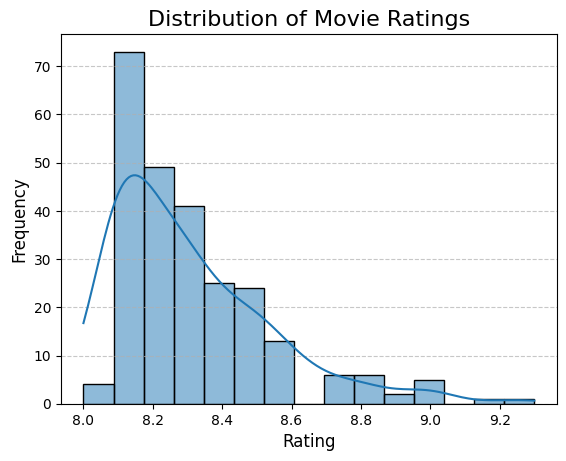

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of movie ratings
sns.histplot(df['Rating'], kde=True, bins=15)
plt.title("Distribution of Movie Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


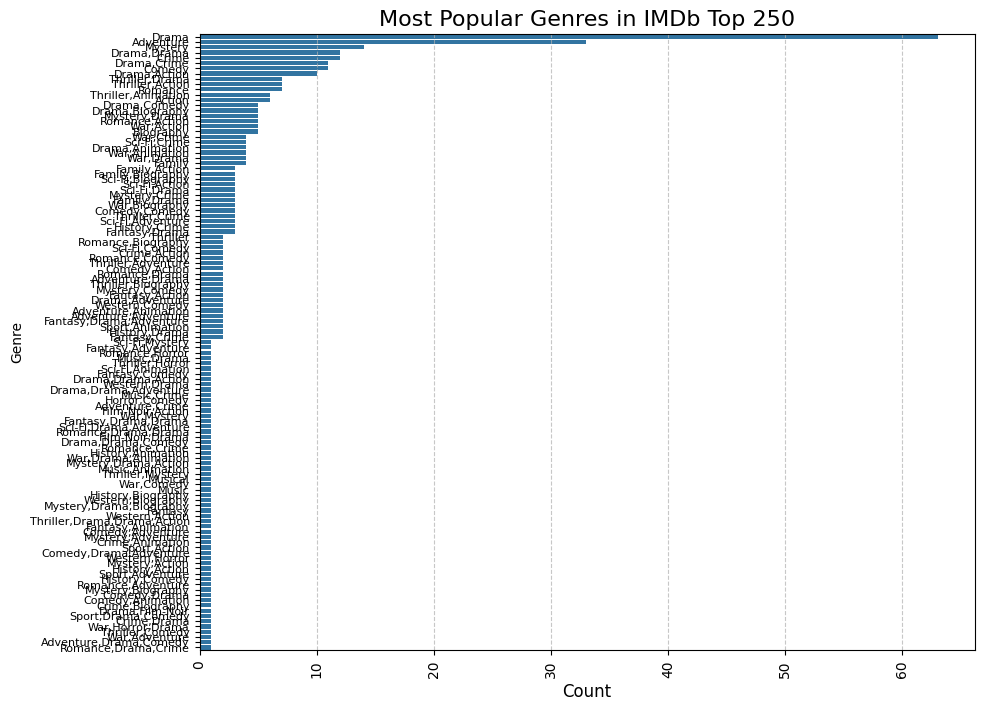

In [20]:
from collections import Counter
import pandas as pd

# Count genres
genre_counts = Counter(",".join(df['Genres']).split(", "))

# Create a DataFrame
genres_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

# Plot genres as a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=genres_df, x="Count", y="Genre")
plt.title("Most Popular Genres in IMDb Top 250", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.xticks(rotation=90)  # Rotate X-axis values vertically
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Nishant shah\AppData\Local\Temp\ipykernel_6732\2851047440.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Rating", ci=None, marker="o")


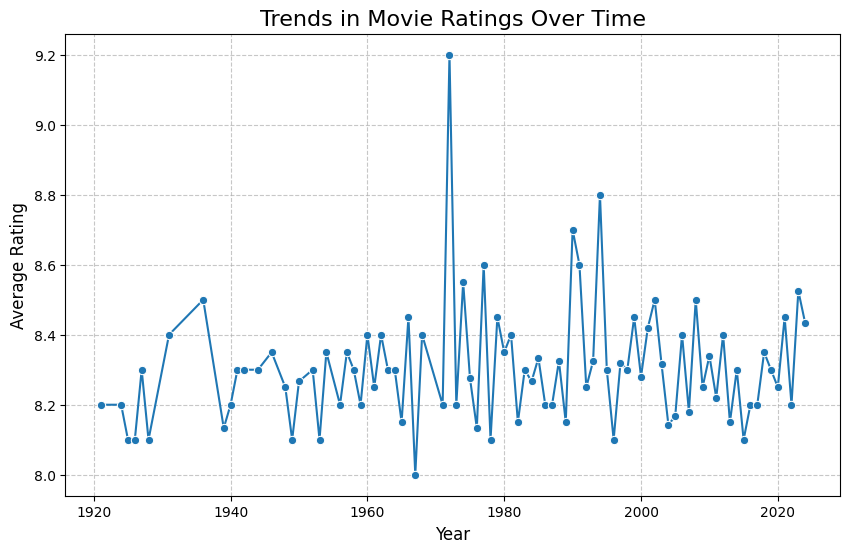

In [21]:
# Trends Over Time:

# Ensure Year column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Plot a line chart for movie ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Rating", ci=None, marker="o")
plt.title("Trends in Movie Ratings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


### Most Common Genres

In [ ]:
most_common_genres = genres_df.head(5)
print("Top 5 Most Common Genres:")
print(most_common_genres)

Top 5 Most Common Genres:
          Genre  Count
5         Drama     63
3     Adventure     33
27      Mystery     14
35  Drama,Drama     12
2         Crime     12


### Successful Directors

In [ ]:
# Count directors
director_counts = df['Director'].value_counts()

# Top 5 directors with multiple movies in the Top 250
print("Top 5 Successful Directors (by number of movies in Top 250):")
print(director_counts.head(5))


Top 5 Successful Directors (by number of movies in Top 250):
Director
Christopher Nolan    8
Steven Spielberg     7
Martin Scorsese      7
Stanley Kubrick      7
Akira Kurosawa       6
Name: count, dtype: int64


### Heatmap of Ratings by Year and Director

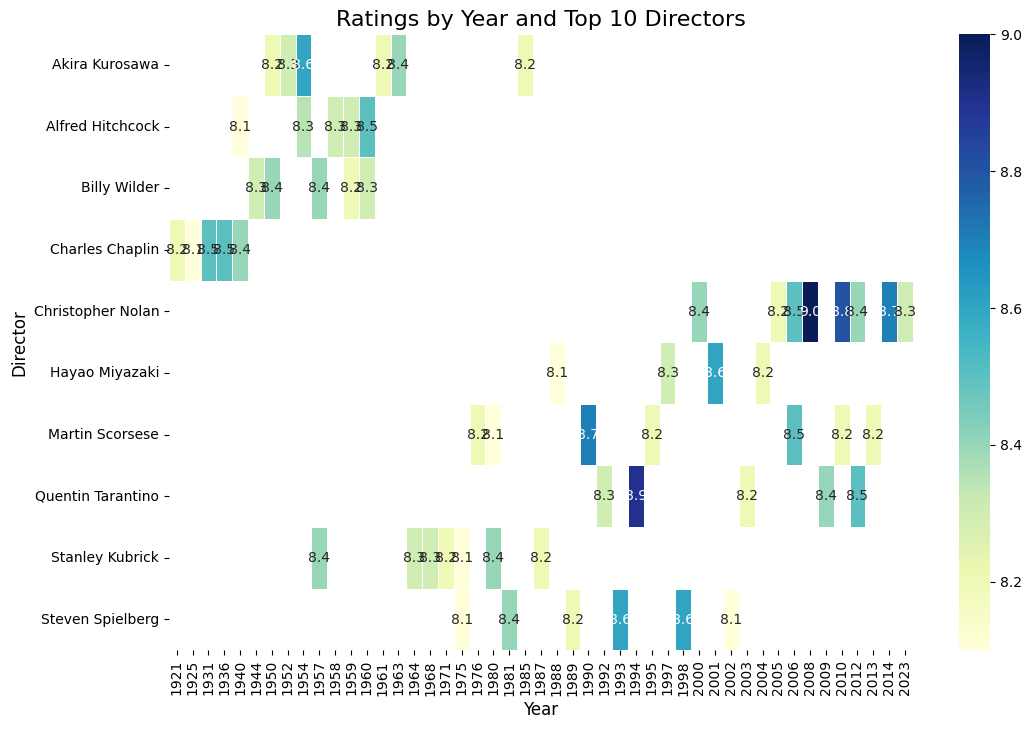

In [25]:
# Prepare data for heatmap (top 10 directors)
top_directors = df["Director"].value_counts().head(10).index
heatmap_data = df[df["Director"].isin(top_directors)].pivot_table(index="Director", columns="Year", values="Rating")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Ratings by Year and Top 10 Directors", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Director", fontsize=12)
plt.show()


### Distribution of Movies by Release Year

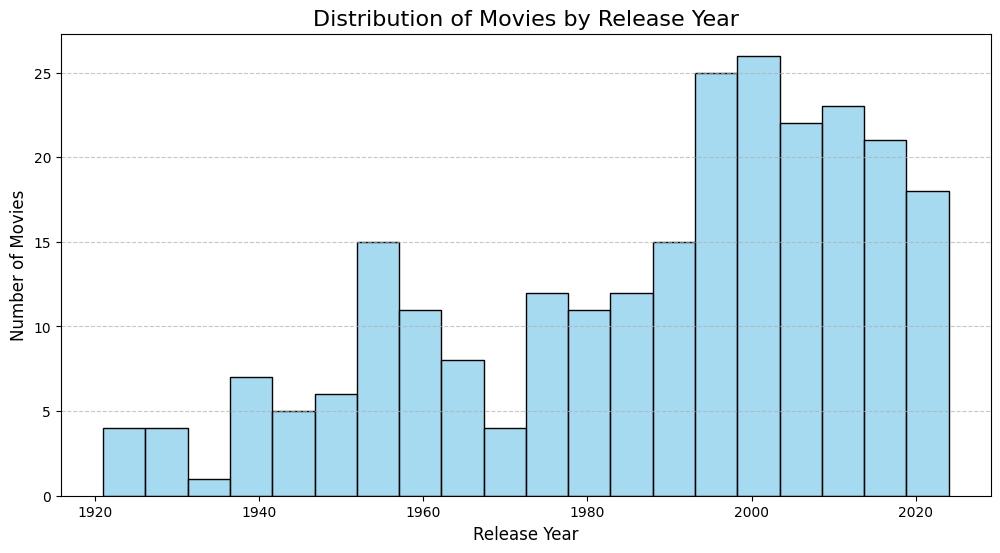

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Year"], bins=20, kde=False, color="skyblue")
plt.title("Distribution of Movies by Release Year", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()